In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
df= pd.read_csv('../../../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


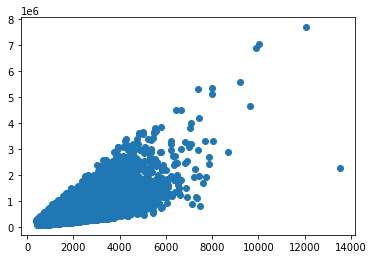

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [5]:
continuous_target_variable= df['price']
strongest_cor= df['sqft_living']
x=strongest_cor
y=continuous_target_variable
plt.scatter(x,y);


plt.show()
plt.figure(figsize=(8, 8))


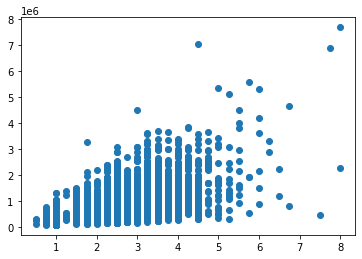

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [6]:
continuous_target_variable= df['price']
strongest_cor= df['bathrooms']
x=strongest_cor
y=continuous_target_variable
plt.scatter(x,y);


plt.show()
plt.figure(figsize=(8, 8))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
cols_to_drop = ['waterfront','yr_renovated','view','condition']
df2 = df.drop(cols_to_drop, axis=1)
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [9]:
model = sm.OLS(df['grade'], df['price'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  grade   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                          7.006e+04
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:34:17   Log-Likelihood:                         -59251.
No. Observations:               21597   AIC:                                  1.185e+05
Df Residuals:                   21596   BIC:                                  1.185e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:

features = ['bathrooms', 'grade', 'sqft_living','bedrooms']
X = df[features]
y = df.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[-27216.39439366  96738.19269069    226.93036677 -39651.27166682]
0.5436006332012617
0.543516083485293


In [11]:
df_w4= df[['bathrooms', 'grade', 'sqft_living','bedrooms','price']]

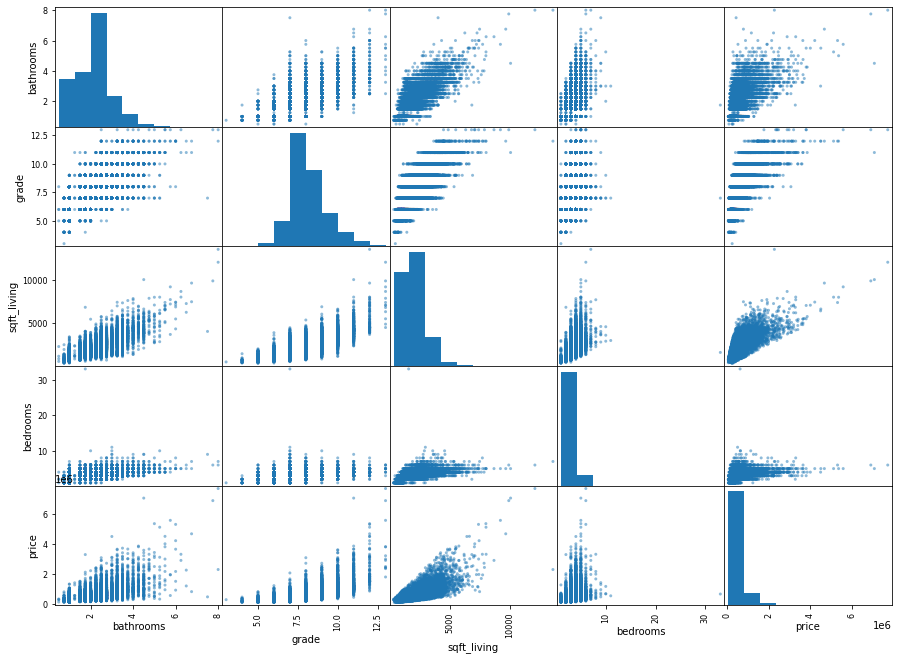

In [12]:
pd.plotting.scatter_matrix(df_w4, figsize=(15,11));
plt.show()

In [14]:
df_ch=df_w4[(np.abs(stats.zscore(df_w4["price"])) < 3)]
df_ch=df_w4[(np.abs(stats.zscore(df_w4["bedrooms"])) < 3)]
df_ch=df_w4[(np.abs(stats.zscore(df_w4["sqft_living"])) < 3)]
df_ch=df_w4[(np.abs(stats.zscore(df_w4["grade"])) < 3)]
df_ch=df_w4[(np.abs(stats.zscore(df_w4["bathrooms"])) < 3)]
df_ch

,bathrooms,grade,sqft_living,bedrooms,price
0,1.00,7,1180,3,221900.0
1,2.25,7,2570,3,538000.0
2,1.00,6,770,2,180000.0
3,3.00,7,1960,4,604000.0
4,2.00,8,1680,3,510000.0
...,...,...,...,...,...
21592,2.50,8,1530,3,360000.0
21593,2.50,8,2310,4,400000.0
21594,0.75,7,1020,2,402101.0
21595,2.50,8,1600,3,400000.0


In [17]:
features = ['bathrooms', 'grade', 'sqft_living','bedrooms']
X = df_ch[features]
y = df_ch.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[107687.39133317]
0.08773381718036166
0.0876912038496992


In [18]:
features = ['bathrooms']
X = df_ch[features]
y = df_ch.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[223833.04432695]
0.2397473931300922
0.2397118805830598


In [19]:
features = ['grade']
X = df_ch[features]
y = df_ch.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[193222.902034]
0.44703040216487255
0.44700457212013067


In [20]:
features = ['sqft_living']
X = df_ch[features]
y = df_ch.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[259.84944589]
0.4605967837554934
0.46057158741691695
